# Prediction Using Unsupervised Learning:

This notebook will walk through some of the basics of K-Means Clustering to predict the optimum number of clusters and Represent it Visually.

## Author: Piyali_Dey.
Copyright Piyali_Dey,2021

### Importing All The Important Libraries:

In [39]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

### Load The DataSet :

In [21]:
iris=pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
#read the dataset with top 5 records
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
#read the dataset with bottom 5 records
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [24]:
#check the shape of the data
iris.shape

(150, 6)

In [25]:
#There are 150 records and 6 columns.

In [26]:
#check the dataset of the information
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
#drom the above table we can infer count,average,min,max,std,percentile for the iris dataset.

In [28]:
#check the information of the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Separated the categorical and numerical colum

In [41]:
num_col=iris.select_dtypes(np.number)

In [42]:
cat_col=iris.select_dtypes('object')

In [47]:
print('The categorical columns :',cat_col.columns)


The categorical columns : Index(['Species'], dtype='object')


In [48]:
print('The numerical columns :',num_col.columns)

The numerical columns : Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


### Checking the null value and the percentage of null value :

In [29]:
number_of_missing_values = iris.isna().sum().sort_values(ascending=False)          
percentage_of_missing_values = (iris.isna().sum()*100/iris.isna().count()).sort_values(ascending=False)   
missing_data = pd.concat([number_of_missing_values,percentage_of_missing_values], axis = 1, keys = ['Total_Count', 'Percentage of Missing Values'])    
missing_data

,Total_Count,Percentage of Missing Values
Species,0,0.0
PetalWidthCm,0,0.0
PetalLengthCm,0,0.0
SepalWidthCm,0,0.0
SepalLengthCm,0,0.0
Id,0,0.0


#we can clearly see that there is no missing value in the data.

In [49]:
#checking the skewness of the data
iris.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [ ]:
there is not much outlier present in the data.

In [58]:
iris.drop_duplicates(inplace=True)

### Label Encoding

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris['Species']=le.fit_transform(iris['Species'])
iris['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

## Visualise using Box Plot

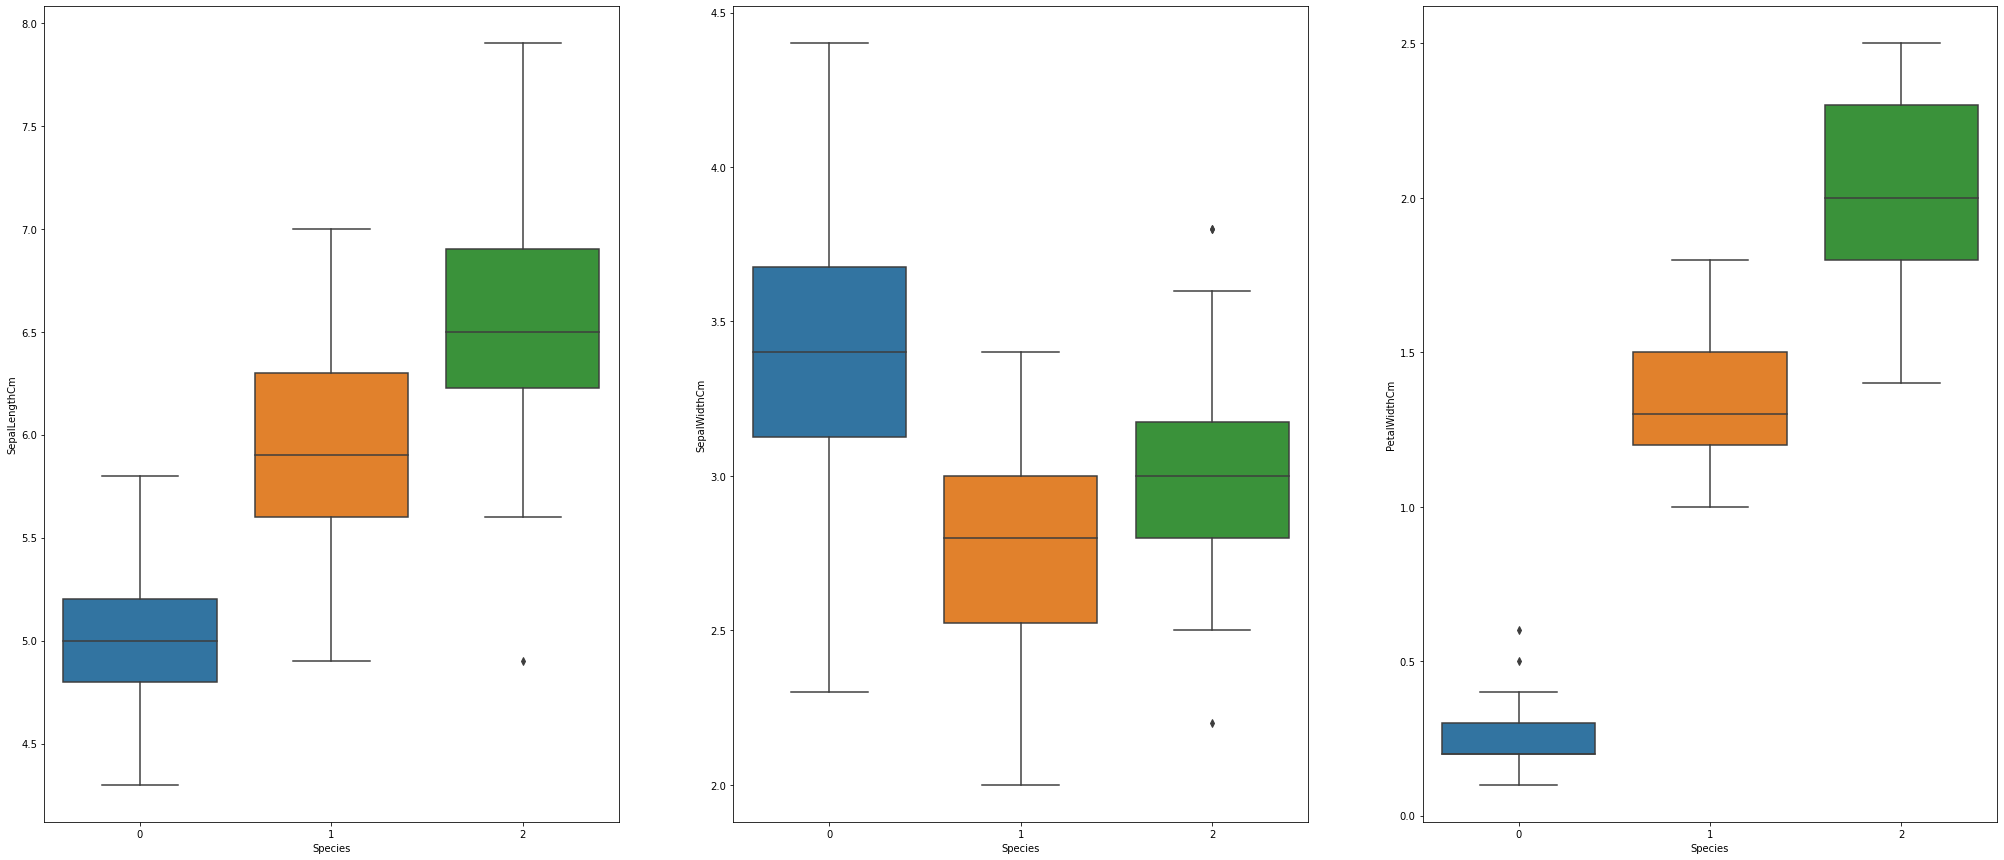

In [60]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
ax = sns.boxplot(x="Species", y="SepalLengthCm",data=iris)

plt.subplot(1,3,2)
ax=sns.boxplot(x="Species", y="SepalWidthCm",data=iris)

plt.subplot(1,3,3)
ax=sns.boxplot(x="Species", y="PetalWidthCm",data=iris)
plt.show()


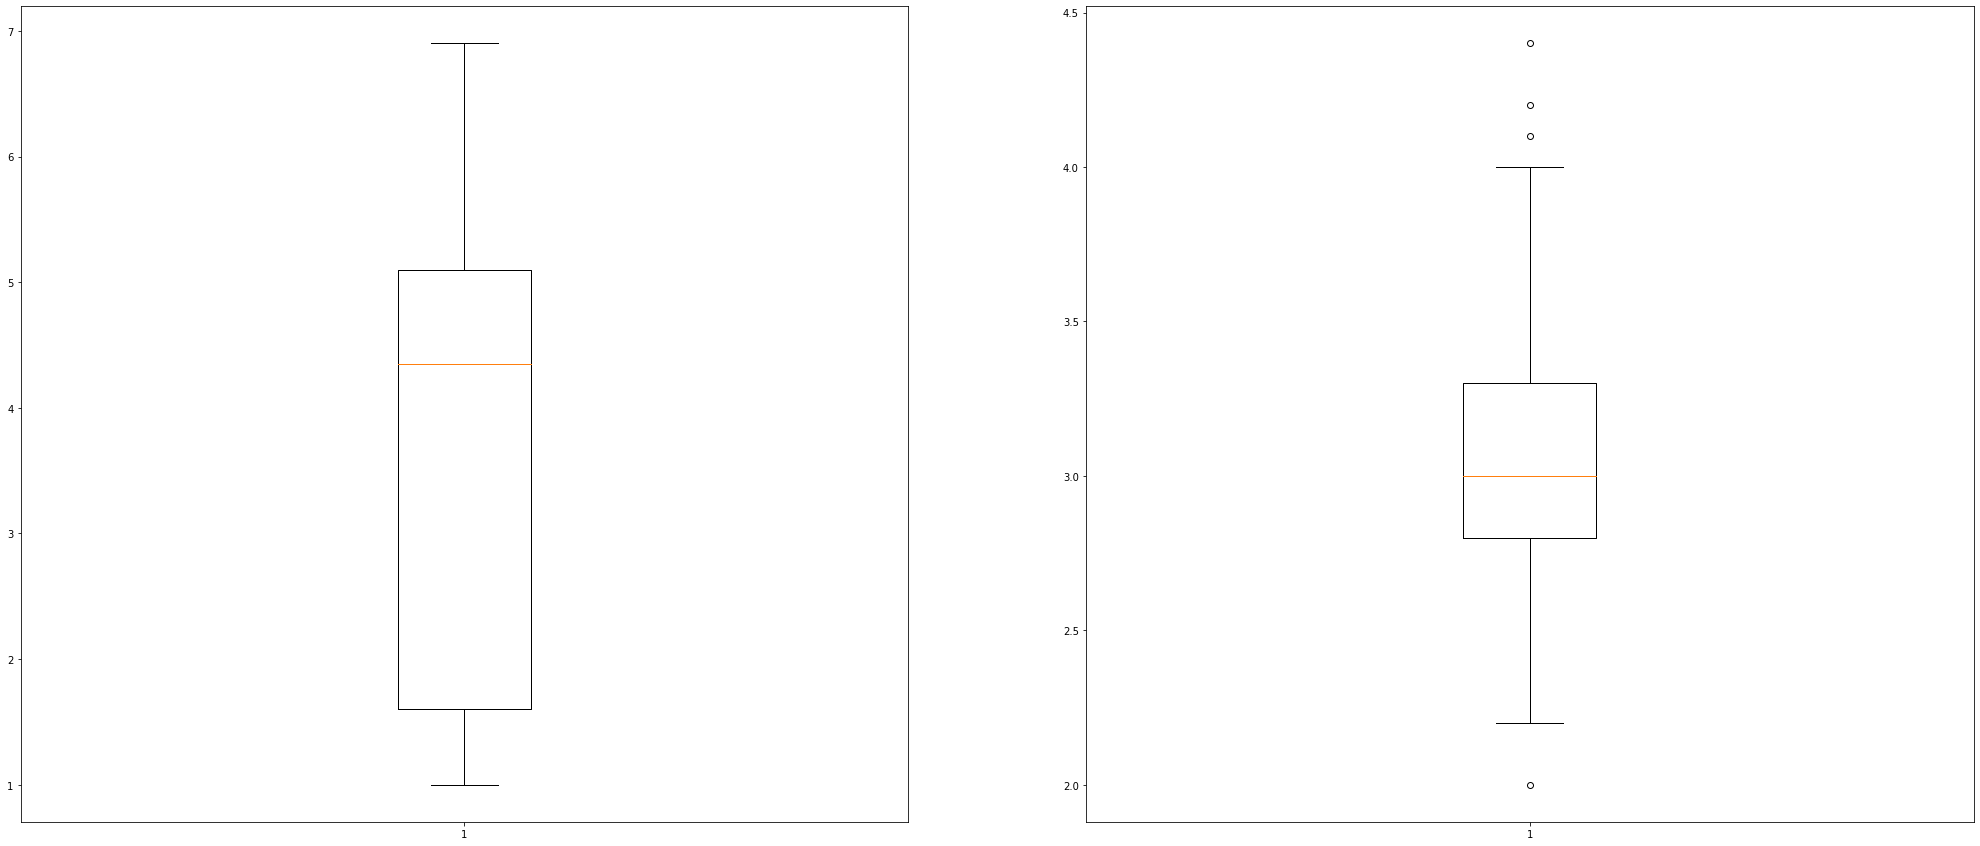

In [61]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
plt.boxplot(iris['PetalLengthCm'])

plt.subplot(1,2,2)
plt.boxplot(iris['SepalWidthCm'])
plt.show()

In [32]:
#very few outliers in the sepalwidth column.

## Visualise Using Scatterplot

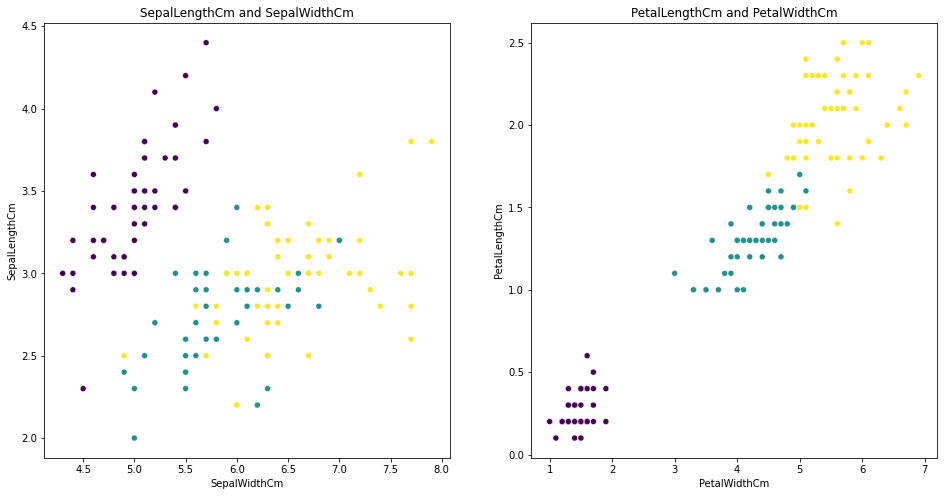

In [63]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.scatterplot(iris['SepalLengthCm'],iris['SepalWidthCm'],c=iris.Species.values)            
plt.title('SepalLengthCm and SepalWidthCm') 
plt.ylabel('SepalLengthCm')
plt.xlabel('SepalWidthCm')

plt.subplot(1,2,2)
sns.scatterplot(iris['PetalLengthCm'],iris['PetalWidthCm'],c=iris.Species.values)            
plt.title('PetalLengthCm and PetalWidthCm') 
plt.ylabel('PetalLengthCm')
plt.xlabel('PetalWidthCm')
plt.show()

* SepelWidth with SepalLength plot is very scatter and overlaped with each other.

* PetalWidth with PetalLength is possitively related with each other.

### PairPlot Visualisation :

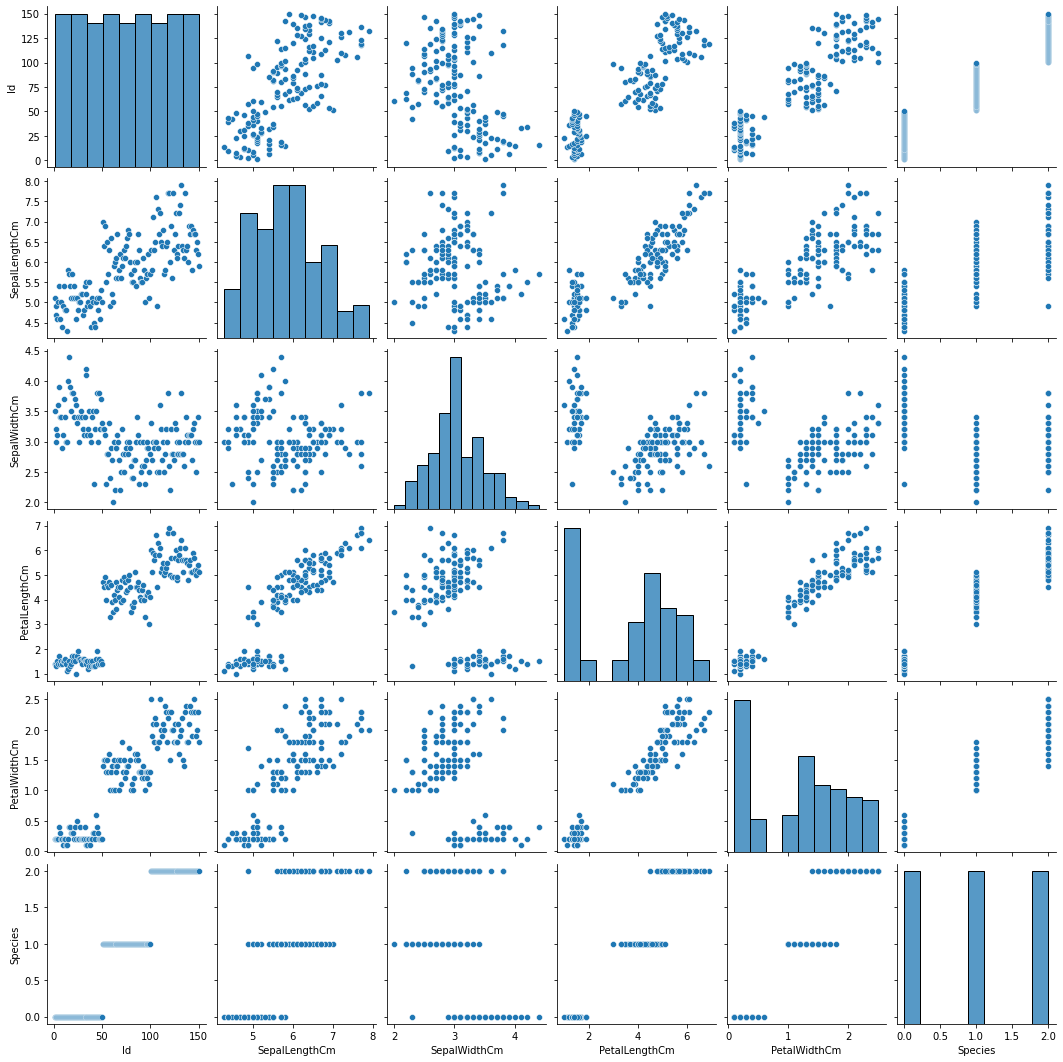

In [64]:
sns.pairplot(iris)

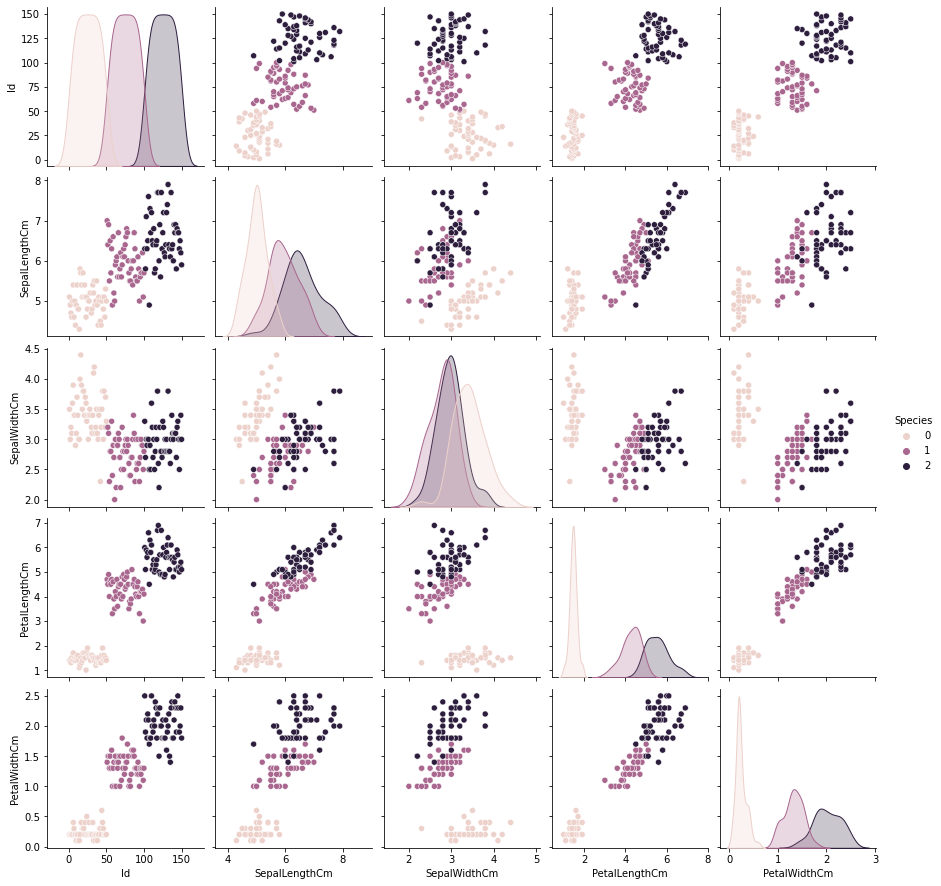

In [65]:
sns.pairplot(iris,hue="Species")

* there are possitive correlation exists in the columns.

* in some of the attribute the datapoints are overlaped .

### Visualise with The Heatmap :

<AxesSubplot:>

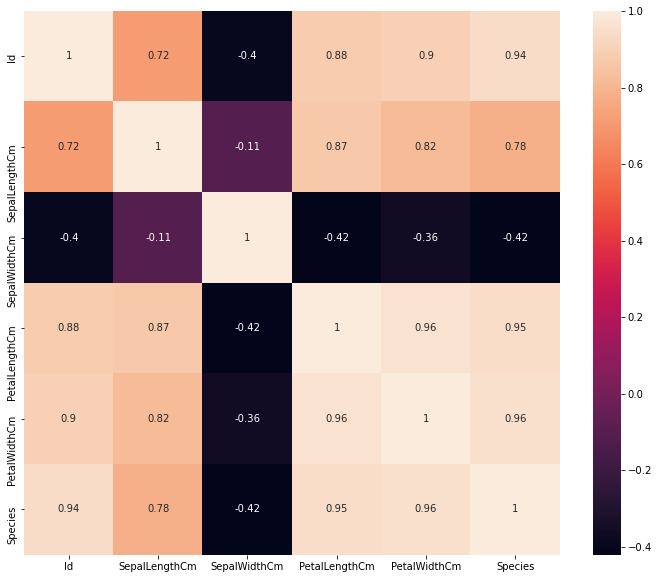

In [66]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(iris.corr(),annot=True)

* There is a Strong correlation between Species-PetalWidth

* There is a Strong correlation between Species-PetalLength

* There is a Strong correlation between Species-SepalLength

* There are also some label of relationship between the independent varieble like petalLength-     petalWidth,sepalLenth-petalLength,sepalLength-petalWidth

### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

In [67]:
iris=iris.iloc[:,[0,1,2,3]].values

In [70]:
from sklearn.cluster import KMeans
error = []
for p in range(1, 11):
    kmeans = KMeans(n_clusters = p, init = 'k-means++', random_state = 10)
    kmeans.fit(iris)
    # inertia method returns wcss for that model
    error.append(kmeans.inertia_)
    
error

[281831.54466666654,
 70581.3808,
 31320.711199999994,
 17760.183406827877,
 11432.513251019653,
 7925.680137179488,
 5892.057079239601,
 4556.503962848298,
 3563.5608014705895,
 2964.496547161172]

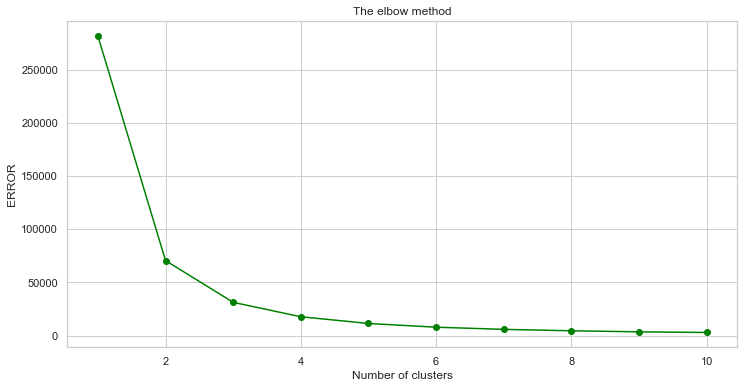

In [76]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(12,6))
sns.set(style='whitegrid')
plt.plot(range(1, 11), error,marker='o',color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('ERROR') # Within cluster sum of squares
plt.show()

The optimum value for K would be 3. As we can see that with an increase in the number of clusters the ERROR value decreases. 
We select the value for K on the basis of the rate of decrease in ERROR and we can see that after 3 the drop in error is minimal.



### Initialization using K-means++

In [77]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 10)
y_kmeans = kmeans.fit_predict(iris)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Now We can Visualise the cluster :

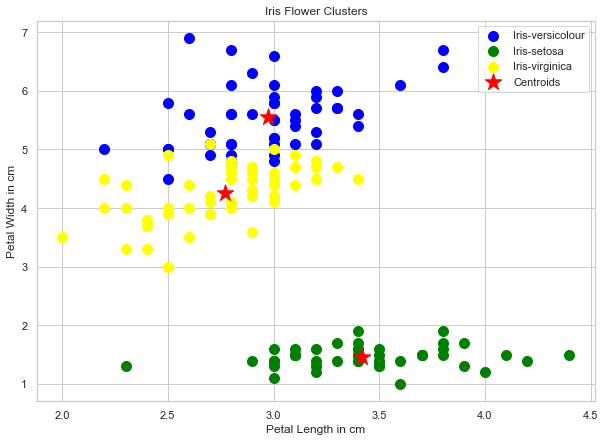

In [80]:
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(iris[y_kmeans == 0, 2], iris[y_kmeans == 0, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(iris[y_kmeans == 1, 2], iris[y_kmeans == 1, 3], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(iris[y_kmeans == 2, 2], iris[y_kmeans == 2, 3],s = 100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'red',marker='*', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()